In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-datapopular-hip-hop-artists-and-tracks/top_hiphop_artists_tracks.csv


In [2]:
data = pd.read_csv('/kaggle/input/spotify-datapopular-hip-hop-artists-and-tracks/top_hiphop_artists_tracks.csv')

In [3]:
data.head(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
5,Drake,God's Plan,87,198973,6DCZcSspjsKoFjzjrWoCdn
6,Drake,Passionfruit,86,298940,5mCPDVBb16L4XQwDdbRUpz
7,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
8,Drake,Fair Trade (with Travis Scott),85,291175,40iJIUlhi6renaREYGeIDS
9,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N


In [4]:
data.tail(10)

,Artist,Track Name,Popularity,Duration (ms),Track ID
430,French Montana,Unforgettable,87,233901,3B54sVLJ402zGa6Xm4YGNe
431,French Montana,Okay,49,192195,36s2D7GbwCzZMfhVD3Bz68
432,French Montana,Where They At,59,173861,0OI6FqVRdAFhWOBo4tq0UV
433,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
434,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [6]:
#check missing value

missing_values = data.iloc[:, :10].isnull().sum()

missing_values

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [9]:
data.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [10]:
# Convert the dataframe to a numpy array
data_np = data.to_numpy()

In [11]:
data_np

array([['Drake', 'Rich Baby Daddy (feat. Sexyy Red & SZA)', 92, 319191,
        '1yeB8MUNeLo9Ek1UEpsyz6'],
       ['Drake', 'One Dance', 91, 173986, '1zi7xx7UVEFkmKfv06H8x0'],
       ['Drake', 'IDGAF (feat. Yeat)', 90, 260111,
        '2YSzYUF3jWqb9YP9VXmpjE'],
       ...,
       ['A$AP Ferg',
        'Work REMIX (feat. A$AP Rocky, French Montana, Trinidad James & ScHoolboy Q)',
        69, 283693, '7xVLFuuYdAvcTfcP3IG3dS'],
       ['Diddy', 'Another One Of Me (feat. 21 Savage)', 65, 220408,
        '4hGmQboiou09EwhcTWa0H6'],
       ['Rick Ross', 'Stay Schemin', 68, 267720,
        '0nq6sfr8z1R5KJ4XUk396e']], dtype=object)

In [12]:
# Check the array shape for an overview of the data size

data_shape = data_np.shape

In [13]:
data_shape

(440, 5)

The frequency of tracks by top 20 artists.

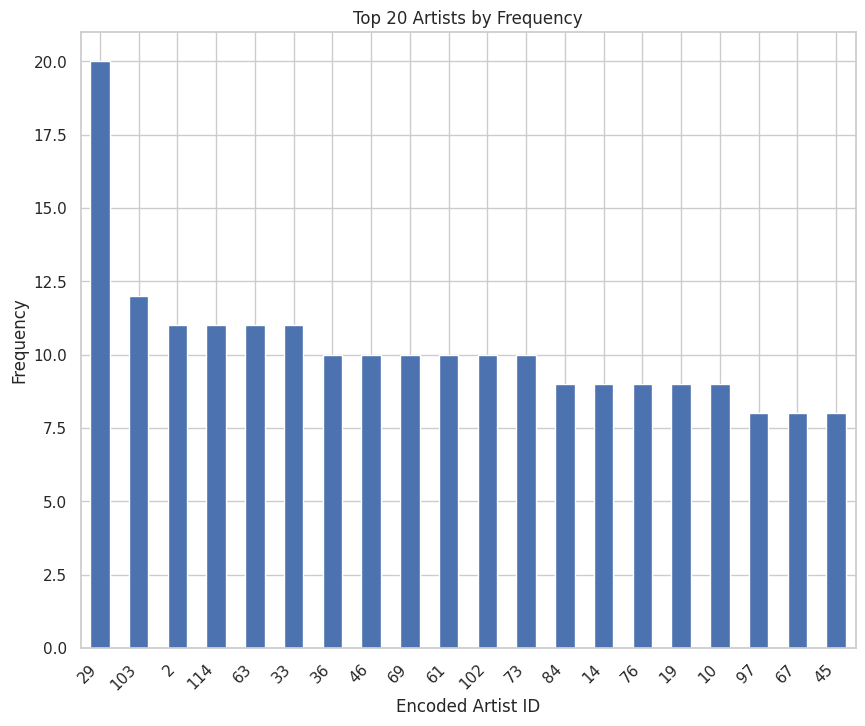

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Since the Artist column has been encoded, we'll visualize the top artists by their frequency in the dataset

artist_counts = data['Artist'].value_counts().head(20)
plt.figure(figsize=(10, 8))
artist_counts.plot(kind='bar')
plt.title('Top 20 Artists by Frequency')
plt.xlabel('Encoded Artist ID')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Histogram - Distribution of Track Popularity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


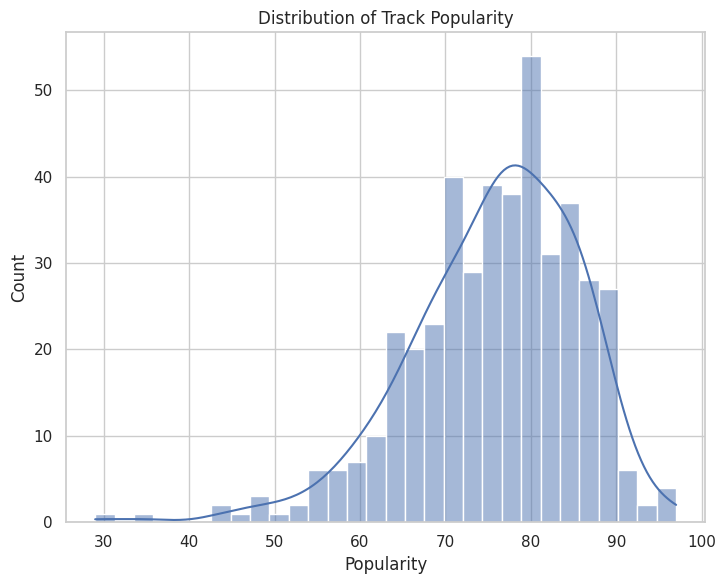

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
plt.figure(figsize=(14, 6))

# Plot distribution of Popularity
plt.subplot(1, 2, 1)
sns.histplot(data['Popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.tight_layout()
plt.show()

Histogram - Distribution of Track Duration

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


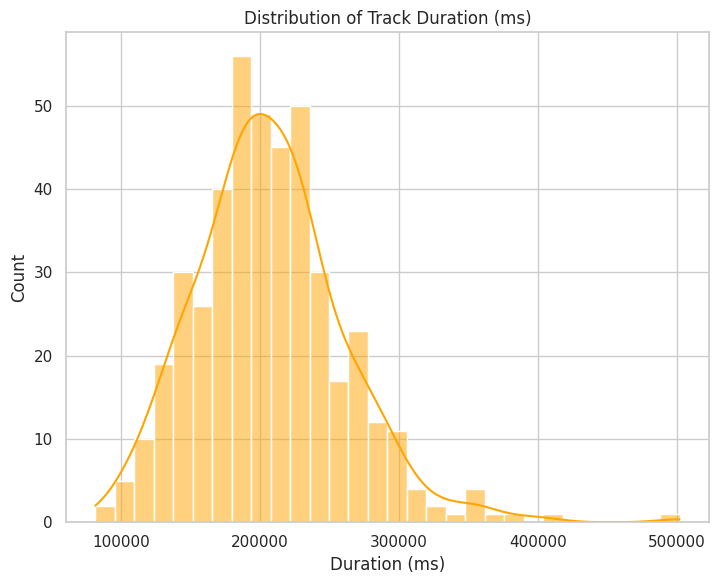

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure to hold the plots
plt.figure(figsize=(14, 6))

# Plot distribution of Duration (ms)
plt.subplot(1, 2, 2)
sns.histplot(data['Duration (ms)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Track Duration (ms)')

plt.tight_layout()
plt.show()

Machine Learning - The linear regression model


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Initialize a MinMaxScaler
scaler = MinMaxScaler()

# Normalize Duration (ms) and Popularity
data['Duration (ms)'] = scaler.fit_transform(data[['Duration (ms)']])
data['Popularity'] = scaler.fit_transform(data[['Popularity']])

# Encode Artist names as categorical variables
label_encoder = LabelEncoder()
data['Artist'] = label_encoder.fit_transform(data['Artist'])

# Splitting the dataset into features (X) and target (y)
X = data.drop(['Track Name', 'Track ID', 'Popularity'], axis=1)
y = data['Popularity']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 2), (88, 2), (352,), (88,))

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(0.018917939347918244, -0.059461173950427826)

The evaluation of the linear regression model yields the following results:

- Mean Squared Error (MSE): 0.0189

- R-squared (R²): -0.0595

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf

(0.010812822919943382, 0.39444958281135856)

The Random Forest Regressor has shown significant improvement over the linear regression model:

- Mean Squared Error (MSE): 0.0108

- R-squared (R²): 0.3944


Model Exploration with Gradient Boosting

In [27]:
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.05)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'MSE: {mse_xgb}, R2: {r2_xgb}')

MSE: 0.012167184043055203, R2: 0.3186013099600784


Hyperparameter Tuning - GridSearchCV for hyperparameter tuning with a RandomForestRegressor

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')

# Perform the search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}


Advanced Feature Engineering

In [29]:
from sklearn.preprocessing import PolynomialFeatures

# Interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features into training and test sets
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Now you can train a model on X_train_poly

Training the Model

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_poly = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the polynomial features
rf_poly.fit(X_train_poly, y_train)

# Predict on the test set transformed with polynomial features
X_test_poly = poly.transform(X_test)  # Ensure you transform the test set as well
y_pred_poly = rf_poly.predict(X_test_poly)

# Evaluate the model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'MSE (Polynomial Features): {mse_poly}')
print(f'R2 (Polynomial Features): {r2_poly}')

MSE (Polynomial Features): 0.010886924199826998
R2 (Polynomial Features): 0.3902996895522196


The R² value of approximately 0.39 suggests that the model, with polynomial features included, explains about 39% of the variance in track popularity.